# Titanic

### Explicação sobre o dataset: 

O  Dataset  consiste  em  dados  dos  passageiros  do  Titanic,  tais  como 
cabine, número de irmãos e pais, sexo, local de embarque, valor do ticket 
entre outros, totalizando 12 colunas e 891 linhas. 

### Objetivo do trabalho: 
 
Classificar passageiros que sobreviveram ou não a partir das relações de 
seus atributos. A partir destes mesmos atributos, realizar uma 
clusterização a fim de identificar grupos de pessoas com características 
semelhantes. 
 
 
### Atividades que serão realizadas sobre o dataset para atingir o objetivo: 
 
Classificação 

Clusterização 


In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn import tree


In [193]:
titanic_data = pd.read_csv('./dataset/Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Atributos e valores faltantes

In [194]:
tipos_atributos = titanic_data.dtypes

valores_nulos = titanic_data.isnull().sum()

tipos_atributos, valores_nulos

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

### Lidando com valores ausentes
Baseado nas informações acima, temos valores ausentes para os atributos AGe, Cabin e Embarked. Para os atributos AGe e Cabin, vamos prencher os valores ausentes com o valor da média e o valor mais frequente, respectivamente. Já o atributo Cabin, vamos descartar, pois são muitos e não temos um mapa das cabines que pudesse afetar na predição

In [195]:
imputer_age = SimpleImputer(strategy='mean')
imputer_embarked = SimpleImputer(strategy='most_frequent')

titanic_data['Age'] = imputer_age.fit_transform(titanic_data[['Age']])
titanic_data['Embarked'] = imputer_embarked.fit_transform(titanic_data[['Embarked']]).ravel()

titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Categorização de atributos

In [196]:
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

titanic_data['Sex'] = label_encoder_sex.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder_embarked.fit_transform(titanic_data['Embarked'])
bins = [0, 12, 17, 64, 100] 
labels = [0, 1, 2, 3]
titanic_data['AgeGroup'] =  pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=True) 

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,2


### Remover classe alvo

In [197]:
X = titanic_data.drop(columns=['Survived', 'Parch', 'SibSp', 'Embarked', 'Age', 'Fare'])
y = titanic_data['Survived']

### Separar conjunto de treino e validação

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treino

In [199]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Métricas

In [200]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:")
print(classification_rep)

Acurácia: 0.7932960893854749
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       105
           1       0.91      0.55      0.69        74

    accuracy                           0.79       179
   macro avg       0.83      0.76      0.77       179
weighted avg       0.82      0.79      0.78       179



### Balanceando os dados

In [201]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_over, y_over = undersample.fit_resample(X, y)

In [202]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(x_over, y_over, test_size=0.2, random_state=42)

In [203]:
decision_tree_balanced = DecisionTreeClassifier(criterion='entropy')
decision_tree_balanced.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(criterion='entropy')

In [204]:
y_pred = decision_tree_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred)
classification_rep_balanced = classification_report(y_test_balanced, y_pred)

print(f"Acurácia: {accuracy_balanced}")
print("Relatório de Classificação:")
print(classification_rep_balanced)

Acurácia: 0.7883211678832117
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        78
           1       0.76      0.75      0.75        59

    accuracy                           0.79       137
   macro avg       0.78      0.78      0.78       137
weighted avg       0.79      0.79      0.79       137



### Resultados após 5 rodadas
Dados desbalanceados
- F1-Score:
    - Não sobreviveu (0): 0.83
    - Sobreviveu (1): 0.75
    - Média Geral dos dois atributos: 0.79



Dados Balanceados
- F1-Score:
    - Não sobreviveu (0): 0.79
    - Sobreviveu (1): 0.75
    - Média Geral dos dois atributos: 0.77


### Árvore de decisão

In [205]:
print(X.columns)

Index(['Pclass', 'Sex', 'AgeGroup'], dtype='object')


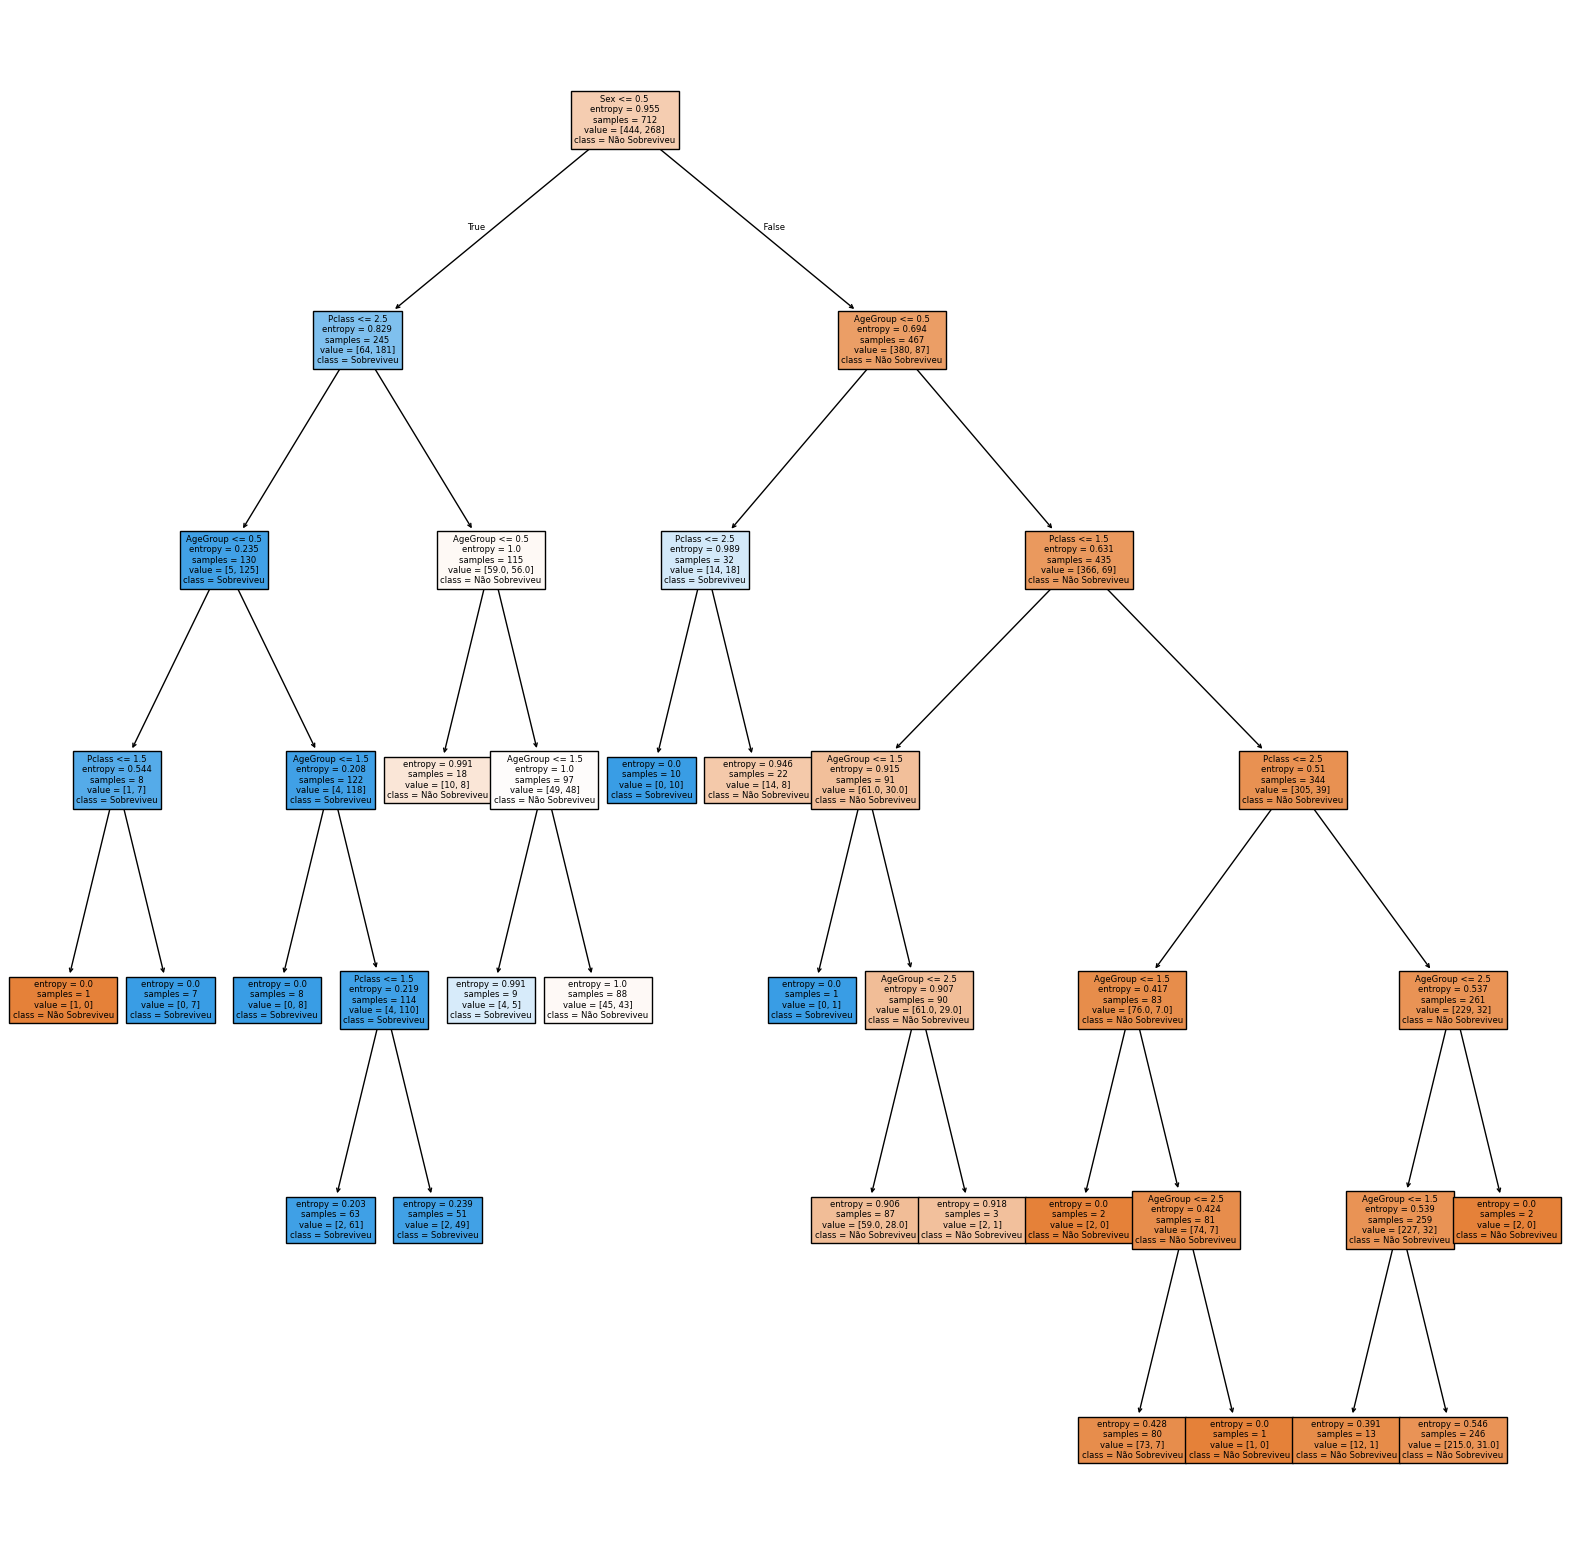

In [206]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree,
               feature_names=X.columns,
               class_names=["Não Sobreviveu", "Sobreviveu"],
               filled=True)
plt.show()


# Clustering

In [207]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Importando dataset

In [ ]:
# Carregar os dados do Titanic
titanic_data = pd.read_csv('./dataset/Titanic-Dataset.csv')

X = titanic_data[['Age', 'Fare', 'SibSp', 'Parch']].dropna()
y = titanic_data.loc[X.index, 'Survived']
X.describe()

,Age,Fare,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000
mean,29.699118,34.694514,0.512605,0.431373
std,14.526497,52.918930,0.929783,0.853289
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,8.050000,0.000000,0.000000
50%,28.000000,15.741700,0.000000,0.000000
75%,38.000000,33.375000,1.000000,1.000000
max,80.000000,512.329200,5.000000,6.000000


### Imprimindo valores

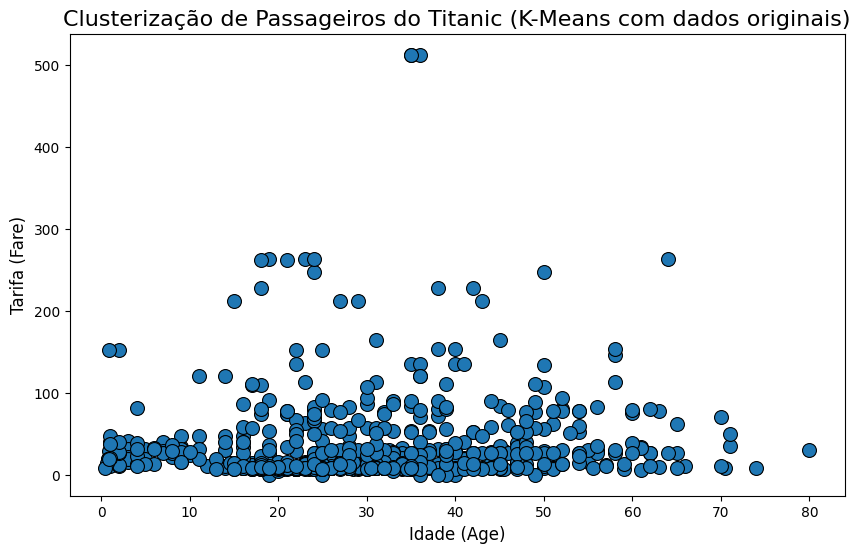

In [209]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=X['Age'],
                y=X['Fare'],
                s=100,
                marker='o',
                edgecolor='black',
                ax=ax)

plt.title('Clusterização de Passageiros do Titanic (K-Means com dados originais)', fontsize=16)
plt.xlabel('Idade (Age)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
plt.show()

## Definindo o número de K
### Método do cotovelo

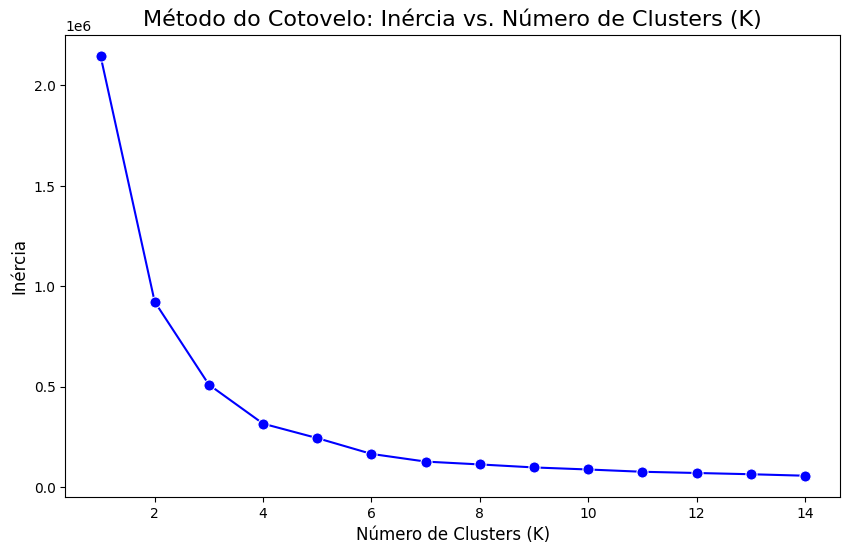

In [218]:
k_values = []
inertial = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    inertial.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))

sns.lineplot(x=k_values, y=inertial, marker='o', color='b', linestyle='-', markersize=8)

plt.title('Método do Cotovelo: Inércia vs. Número de Clusters (K)', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)

plt.show()


## Clusterização

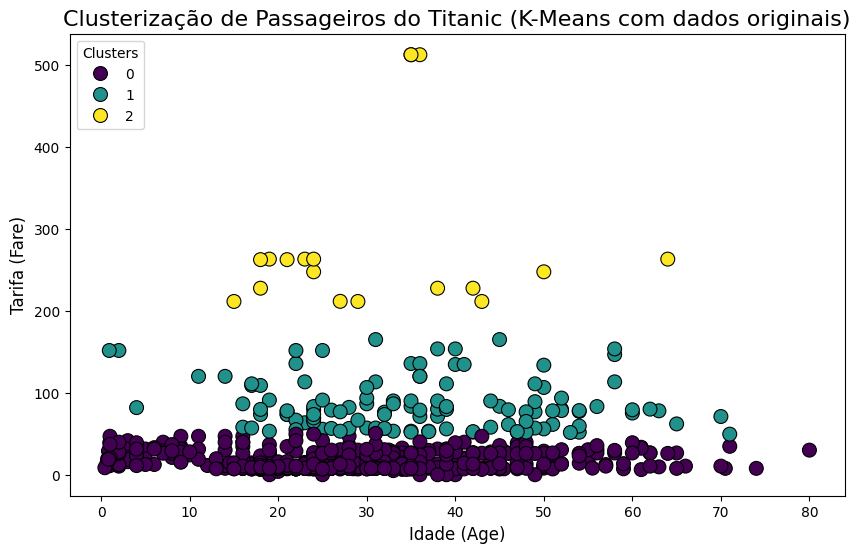

In [211]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=X['Fare'], 
                hue=kmeans.labels_, palette='viridis', 
                s=100, marker='o', edgecolor='black', ax=ax)

plt.title('Clusterização de Passageiros do Titanic (K-Means com dados originais)', fontsize=16)
plt.xlabel('Idade (Age)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
plt.legend(title='Clusters', loc='upper left', fontsize=10)
plt.show()

## Removendo Outliers de Fare

In [212]:
# Calcular o IQR para o atributo Fare
Q1 = X['Fare'].quantile(0.25)
Q3 = X['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para Fare
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover os outliers no atributo Fare
X_no_outliers = X[(X['Fare'] >= lower_bound) & (X['Fare'] <= upper_bound)]

# Verificar a descrição dos dados após remoção dos outliers
X_no_outliers.describe()


,Age,Fare,SibSp,Parch
count,620.000000,620.000000,620.000000,620.000000
mean,29.011694,19.278743,0.488710,0.401613
std,14.394345,14.699209,0.951931,0.847879
min,0.420000,0.000000,0.000000,0.000000
25%,20.000000,7.925000,0.000000,0.000000
50%,28.000000,13.000000,0.000000,0.000000
75%,37.000000,26.287500,1.000000,0.250000
max,80.000000,71.283300,5.000000,6.000000


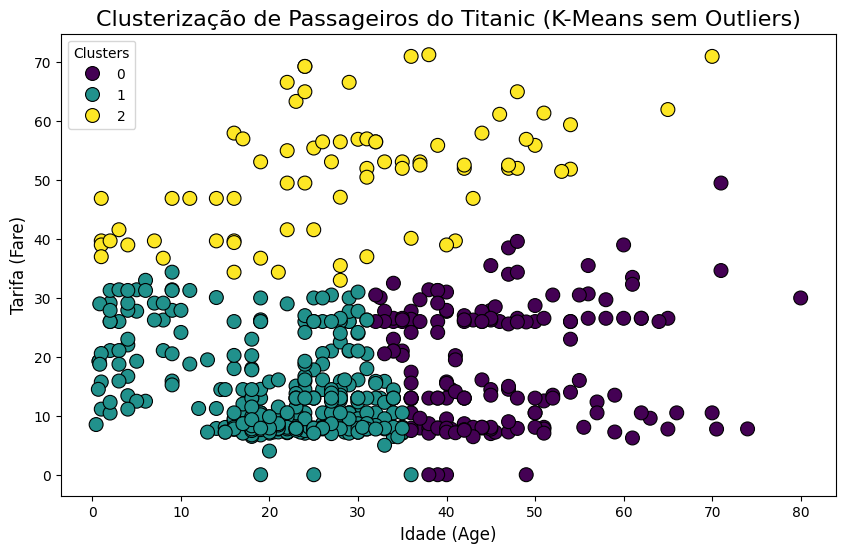

In [213]:
kmeans_no_outliers = KMeans(n_clusters=3, random_state=0).fit(X_no_outliers)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=X_no_outliers['Age'], y=X_no_outliers['Fare'], 
                hue=kmeans_no_outliers.labels_, palette='viridis', 
                s=100, marker='o', edgecolor='black', ax=ax)

plt.title('Clusterização de Passageiros do Titanic (K-Means sem Outliers)', fontsize=16)
plt.xlabel('Idade (Age)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
plt.legend(title='Clusters', loc='upper left', fontsize=10)
plt.show()

## Métricas
### O ARI (Adjusted Rand Index) é uma métrica utilizada para avaliar a similaridade entre duas segmentações ou agrupamentos. É especialmente útil para medir a qualidade de uma clusterização, comparando os rótulos dos clusters gerados com os rótulos reais ou esperados.

### Dados originais

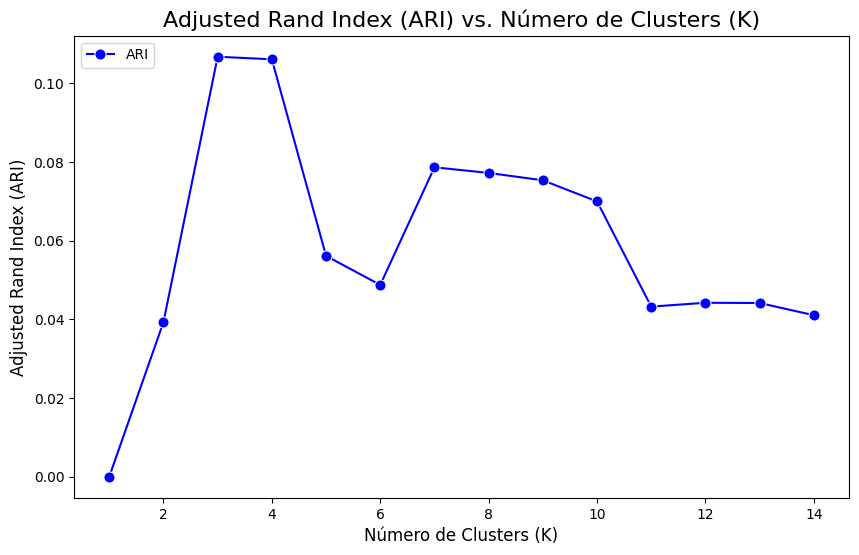

In [214]:
y = titanic_data.loc[X.index, 'Survived']

k_values = []
ari = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    ari.append(metrics.adjusted_rand_score(y, kmeans.labels_))

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=ari, marker='o', color='b', linestyle='-', markersize=8, label='ARI')

plt.title('Adjusted Rand Index (ARI) vs. Número de Clusters (K)', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Adjusted Rand Index (ARI)', fontsize=12)

plt.legend(loc='upper left', fontsize=10)

plt.show()

### Dados sem outliers

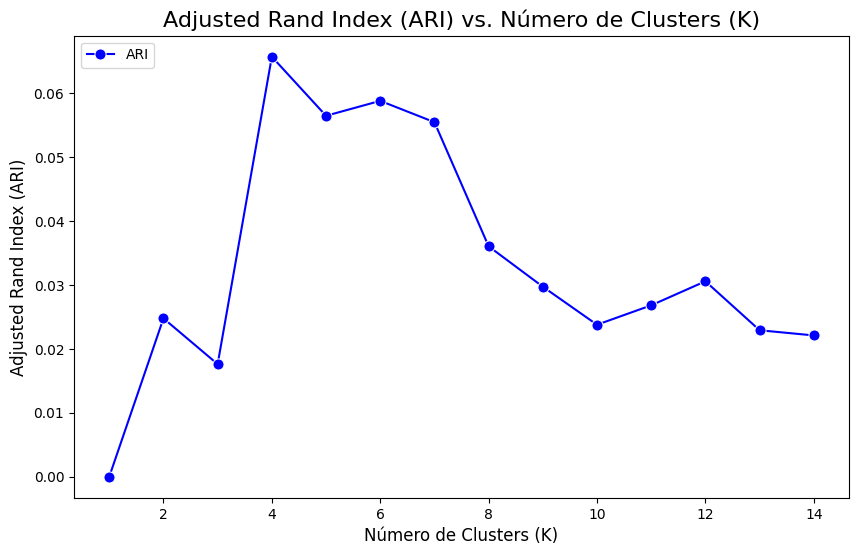

In [215]:
y = titanic_data.loc[X_no_outliers.index, 'Survived']

k_values = []
ari = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_no_outliers)
    k_values.append(i)
    ari.append(metrics.adjusted_rand_score(y, kmeans.labels_))

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=ari, marker='o', color='b', linestyle='-', markersize=8, label='ARI')

plt.title('Adjusted Rand Index (ARI) vs. Número de Clusters (K)', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Adjusted Rand Index (ARI)', fontsize=12)

plt.legend(loc='upper left', fontsize=10)

plt.show()

### Usar Survived para Avaliar a Qualidade dos Clusters

Cluster  Survived
0.0      0           0.666667
         1           0.333333
1.0      1           0.700000
         0           0.300000
2.0      1           0.777778
         0           0.222222
Name: proportion, dtype: float64


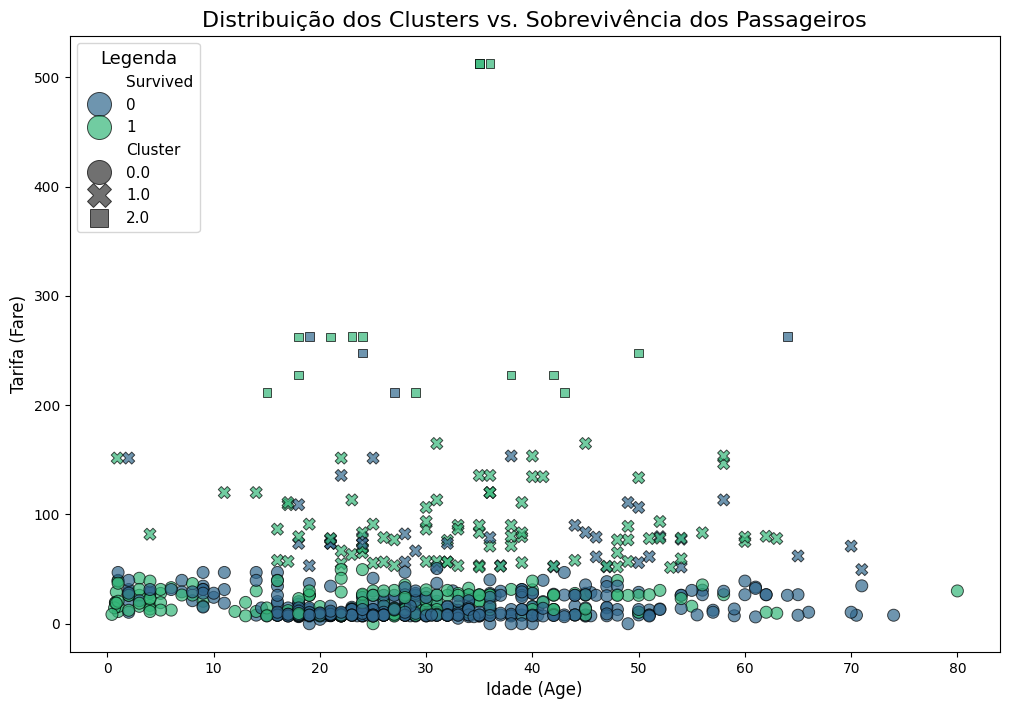

In [217]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

titanic_data.loc[X.index, 'Cluster'] = clusters

print(titanic_data.groupby('Cluster')['Survived'].value_counts(normalize=True))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Cluster', 
                data=titanic_data, palette='viridis', s=75, marker='o', 
                edgecolor='black', alpha=0.7)

plt.title('Distribuição dos Clusters vs. Sobrevivência dos Passageiros', fontsize=16)
plt.xlabel('Idade (Age)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
plt.legend(title='Legenda', title_fontsize='13', fontsize='11', loc='upper left', markerscale=2)
plt.show()